In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

Parameters

In [2]:
u = 10
dx = 8
dz = 0.1
N2 = 1     #constant. N^2 = g * d ln(θ)/dz, where θ is the potential temperature. Relates change in temperature with change in height. Does technically vary with
            #height but is assumed to be constant. Square of the buoancy frequency.
xlen = 1000 #meters
zlen = 250 # meters

#Setting up the ground
def ground(x):
    ans = 10 * np.sin((np.pi * x) / 250) + 10
    return ans
# Setting up the slope of the ground
def slope(y):
    der = np.pi  * np.cos((np.pi * y) / 250) / 25
    return der
def previousZStep(z, speed, delZ):
    twoDer = (speed * slope(z) - delZ * np.pi * np.tan((np.pi * z) / 250)
             / 25 - delZ**2 * np.pi * (np.cos((np.pi * (z)) / 250))**(-3) / 500)
    return twoDer
nx = int(xlen / dx) + 1
nz = int(zlen / dz) 

xpos = np.arange(0, xlen + 1, dx)
zpos = np.arange(0, zlen + dz, dz)

Setting up vectors

In [3]:
initial_w = u * slope(xpos)
initial_prev_w = previousZStep(xpos, u, dz)

solution = np.zeros([nx, nz])
solution[:,1] = initial_w
solution[:, 0] = initial_prev_w
print(solution)
print(initial_w)

[[1.25657423 1.25663706 0.         ... 0.         0.         0.        ]
 [1.24959474 1.25029232 0.         ... 0.         0.         0.        ]
 [1.22997477 1.23132217 0.         ... 0.         0.         0.        ]
 ...
 [1.232536   1.23132217 0.         ... 0.         0.         0.        ]
 [1.25086232 1.25029232 0.         ... 0.         0.         0.        ]
 [1.25657423 1.25663706 0.         ... 0.         0.         0.        ]]
[ 1.25663706  1.25029232  1.23132217  1.19991818  1.15639744  1.10119945
  1.03488158  0.95811352  0.87167045  0.77642529  0.67333981  0.56345497
  0.44788038  0.3277831   0.20437589  0.07890489 -0.04736288 -0.17315239
 -0.2971934  -0.41823337 -0.53505004 -0.64646378 -0.75134956 -0.84864824
 -0.93737729 -1.01664074 -1.08563818 -1.14367289 -1.19015883 -1.22462659
 -1.2467281  -1.2562402  -1.25306683 -1.23724003 -1.20891963 -1.16839159
 -1.11606518 -1.05246878 -0.97824458 -0.8941421  -0.80101061 -0.69979054
 -0.59150401 -0.47724449 -0.35816577 -0.23547

In [4]:
from scipy.sparse import spdiags

Making Matrices

In [5]:
c1 = (-dz ** 2) / (dx ** 2)
c2 = 2 + 2 * ((dz ** 2) / (dx ** 2)) - (N2 / u) * dz ** 2
mat = np.array([c1 * np.ones(nx), c2 * np.ones(nx), c1 * np.ones(nx)])
diags = np.array([-1,0,1])
M = spdiags(mat, diags, nx, nx).toarray()

Boundary Conditions

In [6]:
#M[0,0] = 1
#M[0,1] = 0 

#M[-1,-1] = 1 
#M[-1,-2] = 0 
M[0, -1] = c1
M[-1, 0] = c1

Looping

In [7]:
for k in np.arange(nz-2):
    solution[:,k+2] = np.matmul(M,solution[:,k+1]) - solution[:,k]

z_domain = np.linspace(0,zlen,nz)
x_domain = np.linspace(0,xlen,nx)
plt.figure(figsize=(10, 5))
plt.pcolormesh(x_domain, z_domain, solution.T, cmap='viridis')
plt.colorbar(label="Vertical velocity (w)")
plt.xlabel("Horizontal position (m)")
plt.ylabel("Height (m)")
plt.title("Vertical Velocity (w)")
plt.tight_layout()
plt.show()

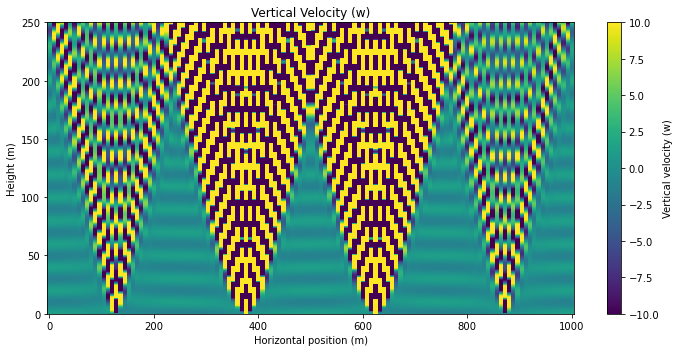

[0.00000000e+00 1.00040016e-01 2.00080032e-01 ... 2.49799920e+02
 2.49899960e+02 2.50000000e+02]
2500


In [12]:
z_domain = np.linspace(0,zlen,nz)
x_domain = np.linspace(0,xlen,nx)
plt.figure(figsize=(10, 5))
plt.pcolormesh(x_domain, z_domain, solution.T, cmap='viridis', vmin=-10, vmax=10)
plt.colorbar(label="Vertical velocity (w)")
plt.xlabel("Horizontal position (m)")
plt.ylabel("Height (m)")
plt.title("Vertical Velocity (w)")
plt.tight_layout()
plt.show()


In [23]:
print((solution[:, 4]))

[-1.25663706e+00  1.24758171e+00  1.23182550e+00  1.20466407e+00
  1.16572927e+00  1.11558542e+00  1.05495755e+00  9.84754307e-01
  9.06112306e-01  8.20487421e-01  7.29857243e-01  6.37220803e-01
  5.48048902e-01  4.75751933e-01  4.75117745e-01  1.43869100e+00
 -4.56327252e+00 -5.13864856e-01 -4.64297673e-01 -5.27502367e-01
 -6.14291823e-01 -7.06733287e-01 -7.98205397e-01 -8.85294702e-01
 -9.65834530e-01 -1.03826440e+00 -1.10137922e+00 -1.15421871e+00
 -1.19601468e+00 -1.22616412e+00 -1.24421465e+00 -1.24985575e+00
 -1.24291236e+00 -1.22333901e+00 -1.19121310e+00 -1.14672616e+00
 -1.09017174e+00 -1.02192802e+00 -9.42431378e-01 -8.52134326e-01
 -7.51433753e-01 -6.40538323e-01 -5.19200421e-01 -3.86120537e-01
 -2.37542915e-01 -6.52950156e-02  2.03892075e-02  9.19276611e+01
 -7.87472314e-02  1.11031098e-01  2.76509577e-01  4.20633610e-01
  5.50558020e-01  6.69219839e-01  7.77567780e-01  8.75697530e-01
  9.63335499e-01  1.04006163e+00  1.10542223e+00  1.15899229e+00
  1.20041276e+00  1.22941

In [18]:
ground_pos = ground(xpos)

In [10]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

$$\left ( \frac{\partial^2 w'}{\partial x^2} +\frac{\partial^2w'}{\partial z^2}\right ) + \frac{N^2}{\bar{u}^2}w'=0$$

2D Laplacian Equation /\
Expected Solution \/

$$w(x, z) = \begin{Bmatrix} -\bar{u}h_Mke^{-\mu z}\text{sin}kx, & \bar{u}k > N \\ -\bar{u}h_Mk\text{sin}(kx+mz), & \bar{u}k < N\end{Bmatrix}$$
where $h_m$ is amplitude of the surface, $k$ & $\bar{u}$ are constants of the vertical structure

$$\frac{w_{i-1}^j-2w_i^j+w_{i+1}^j}{\Delta x^2}+\frac{N^2}{\bar{u}}w^j_i = \frac{w_{i}^{j-1}-2w_i^j+w_{i}^{j+1}}{\Delta z^2}$$
$$\rightarrow w_i^{j+1} = \left ( 2 + \frac{2\Delta z^2}{\Delta x^2} - \frac{N^2}{\bar{u}}\Delta z^2 \right ) w_{i}^j - \frac{\Delta z^2}{\Delta x^2} w^j_{i-1} - \frac{\Delta z^2}{\Delta x^2} w^j_{i+1} - w^{j-1}_i$$

Numerical Method/\
General Form \/

$$\begin{bmatrix}\  \vdots \\ w^{j+1}_i \\ \vdots\end{bmatrix} = \begin{bmatrix} 2 + \frac{2\Delta z^2}{\Delta x^2} - \frac{N^2}{\bar{u}}\Delta z^2 & -\frac{\Delta z^2}{\Delta x^2} & \cdots & 0 \\ -\frac{\Delta z^2}{\Delta x^2}  & \ddots & \ddots & \vdots \\ \vdots & \ddots & \ddots & -\frac{\Delta z^2}{\Delta x^2}\\ 0 & \cdots & -\frac{\Delta z^2}{\Delta x^2} & 2 + \frac{2\Delta z^2}{\Delta x^2} - \frac{N^2}{\bar{u}}\Delta z^2\end{bmatrix}\begin{bmatrix}\  \vdots \\ w^{j}_i \\ \vdots\end{bmatrix} - \begin{bmatrix}\  \vdots \\ w^{j-1}_i \\ \vdots\end{bmatrix}$$ 


(2500, 126)
(126,)
(3500, 126)
2700
270.0


NameError: name 'c' is not defined

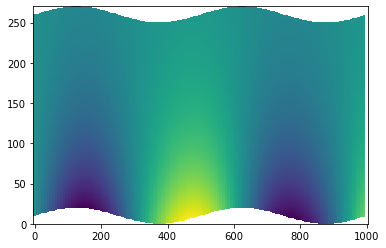

In [62]:
k_const = 0.0101
mu = (abs(N2 / 10**2 - k_const))**0.5
def wExpect(x, z, mu, k_const):
    output = -10 * 10*k_const*np.exp(-mu*z)*np.sin(k_const*x)
    return output
z_domain = np.linspace(0,zlen,nz)
x_domain = np.linspace(0,xlen,nx)
xx, zz = np.meshgrid(x_domain, z_domain)
toPlotExpect = wExpect(xx, zz, mu, k_const)
print(np.shape(toPlotExpect))
print(np.shape(x_domain))
tsol = toPlotExpect
l,w = np.shape(tsol)

newl = l + 1000
altarr = np.full((newl, w),np.nan)
print(np.shape(altarr))

for i in np.arange(0,len(ground_pos) - 1):
    shift = np.round(ground_pos[i] / dz).astype(int)
    altarr[shift:shift + l,i] = tsol[:,i]
    

altitudearr= altarr[~np.isnan(altarr).all(axis=1)]
newsize, var1 = np.shape(altitudearr)
print(newsize)
newlenz = newsize * dz
print(newlenz)
nz1 = int(newlenz / dz) 
newz = np.linspace(0,newlenz,nz1)

fig, ax = plt.subplots()

vertical_vel = ax.pcolormesh(x_domain, newz, altitudearr, cmap='viridis', shading='auto')
fig.colorbar(c, ax=ax, label="Vertical velocity (w)")

ax.plot(x_domain, ground_pos, color='red', label='Ground position')
ax.set_xlabel("Horizontal position (m)")
ax.set_ylabel("Height (m)")
ax.set_title("Vertical Velocity (w)")
ax.legend()

plt.tight_layout()
plt.show()

#plt.figure(figsize=(10, 5))
#plt.pcolormesh(x_domain, z_domain, toPlotExpect, cmap='viridis')
#plt.colorbar(label="Vertical velocity (w)")
#plt.xlabel("Horizontal position (m)")
#plt.ylabel("Height (m)")
#plt.title("Vertical Velocity (w)")
#plt.tight_layout()
#plt.show()
#print(wExpect(10, 100, mu))

Numerical method part
Screw with 2nd derivative thing
plot numerical solution, k = 2

We chose to use Euler forward in time with central space differencing because it was the simplest method to implement, and the form of the studied equations matches the 